In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from collections import namedtuple
import collections



In [0]:
#Selects best action given a state and Q function
def best_action(Q,state):
  best_act = 0   
  maxval = 0
  for action in range(nA):
    if( Q[(state,action)] > maxval):
      maxval = Q[(state,action)]
      best_act = action
    
  return maxval,best_act    

In [0]:
#Implementing Greedy policy
def greedy(Q,state,nA):
  value,action = best_action(Q,state) 
  return action

In [0]:
#Implementing Epsilon Greedy Policy 
def epsilon_greedy(Q,state,nA): 
  value, action = best_action(Q, state)
  if (random.random() < epsilon):
    return random.randint(0,nA-1)
  else:
    return action

In [0]:
# Implementing Q Learning Algorithm - Update Q(s0,action) according to Q(s1,..) and reward

def Q_learning(Q,s0,s1,reward,action):
  best_q,_ = best_action(Q,s1) # Take the best value reachable from the state s1
  target = reward + discount_factor*best_q #Calculate target
  error = target - Q[(s0,action)] #Calculate error
  Q[(s0,action)] += learning_rate*error #Update Q value 

In [0]:
#Setting hyperparameters

discount_factor = 0.95
epsilon =  1.0
num_episodes = 15001
test_episodes = 100
epsilon_decay = 0.9993
learning_rate = 0.8


In [0]:
#Function to test the algorithm 
def test(env, Q, nA):
   
    reward_full = []
    episode_lengths = []
    for _ in range(test_episodes):
        obs = env.reset()
        rewards = 0
        t = 0
        while True:
            # Act greedly 
            next_obs, reward, done, _ = env.step(greedy(Q, obs, nA))
            obs = next_obs
            rewards += reward
            t += 1

            if done:
                #print(rewards)
                reward_full.append(rewards)
                episode_lengths.append(t)
                break

    return np.mean(reward_full) , np.mean(episode_lengths)

In [102]:
env = gym.make("FrozenLake-v0")  #Create environment
obs = env.reset()
nA = env.action_space.n  #Total number of actions
reward_count = 0
episode_count = 0


#Creating Q Table
Q = collections.defaultdict(float)
    
rewards_list = []

episode_length = []

while episode_count < num_episodes:

    # Use epsilon greedy action selection
    action = epsilon_greedy(Q, obs, nA)
    next_obs, reward, done, _ = env.step(action)
    #Update Q value
    Q_learning(Q, obs, next_obs, reward ,action)
    reward_count += reward
    obs = next_obs
    
    if done:
        epsilon *= epsilon_decay #Decaying epsilon rate
        

        # Testing once in 1000 time steps
        if (episode_count % 1000 == 0):
            reward_test,lengthep = test(env,Q,nA)
            print('\tEpisode:', episode_count, 'Test Reward:', reward_test,'Episode length:' , lengthep, 'Epsilon val :' ,np.round(epsilon,3))

            rewards_list.append(reward_test)
            episode_length.append(lengthep)

        obs = env.reset()
        reward_count = 0
        
        episode_count += 1  
        
        
       



	Episode: 0 Test Reward: 0.0 Episode length: 18.72 Epsilon val : 0.999
	Episode: 1000 Test Reward: 0.22 Episode length: 17.23 Epsilon val : 0.496
	Episode: 2000 Test Reward: 0.2 Episode length: 14.23 Epsilon val : 0.246
	Episode: 3000 Test Reward: 0.0 Episode length: 9.38 Epsilon val : 0.122
	Episode: 4000 Test Reward: 0.72 Episode length: 46.23 Epsilon val : 0.061
	Episode: 5000 Test Reward: 0.13 Episode length: 11.55 Epsilon val : 0.03
	Episode: 6000 Test Reward: 0.62 Episode length: 39.73 Epsilon val : 0.015
	Episode: 7000 Test Reward: 0.79 Episode length: 41.74 Epsilon val : 0.007
	Episode: 8000 Test Reward: 0.59 Episode length: 48.96 Epsilon val : 0.004
	Episode: 9000 Test Reward: 0.72 Episode length: 47.47 Epsilon val : 0.002
	Episode: 10000 Test Reward: 0.51 Episode length: 61.01 Epsilon val : 0.001
	Episode: 11000 Test Reward: 0.82 Episode length: 39.67 Epsilon val : 0.0
	Episode: 12000 Test Reward: 0.74 Episode length: 47.87 Epsilon val : 0.0
	Episode: 13000 Test Reward: 0.8 E

## **VISUALIZATIONS**

### **Reward vs No. of Episodes**

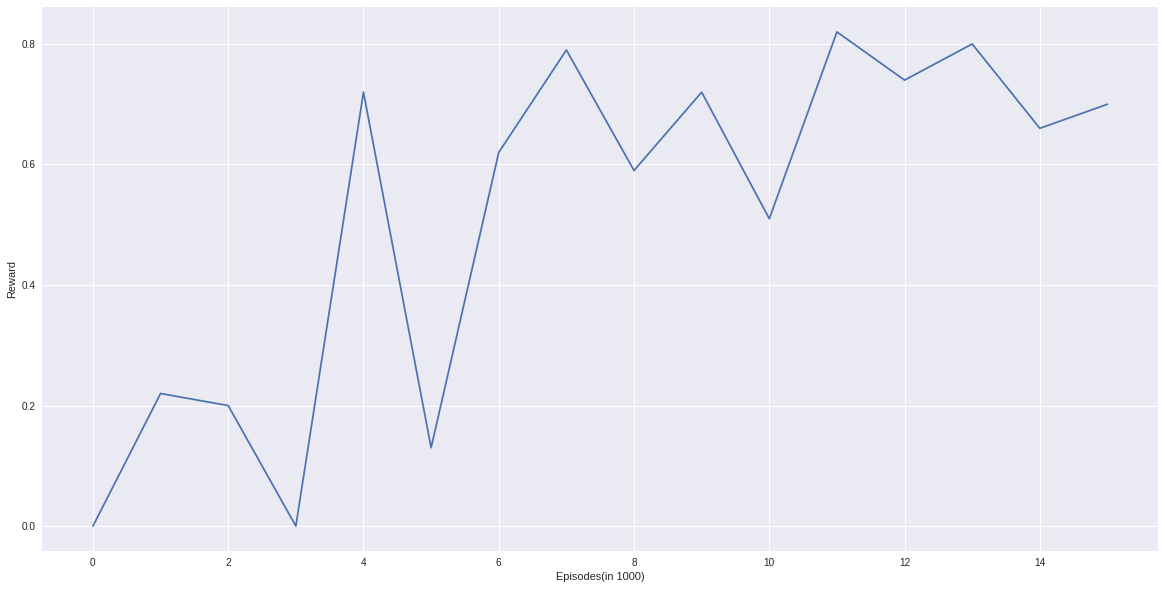

In [103]:
#Plotting Reward vs No of Episodes

plt.figure(figsize=(20,10))
plt.xlabel('Episodes(in 1000)')
plt.ylabel('Reward')
plt.plot(rewards_list)
plt.show() 

### **Episode Length vs No. of Episodes**

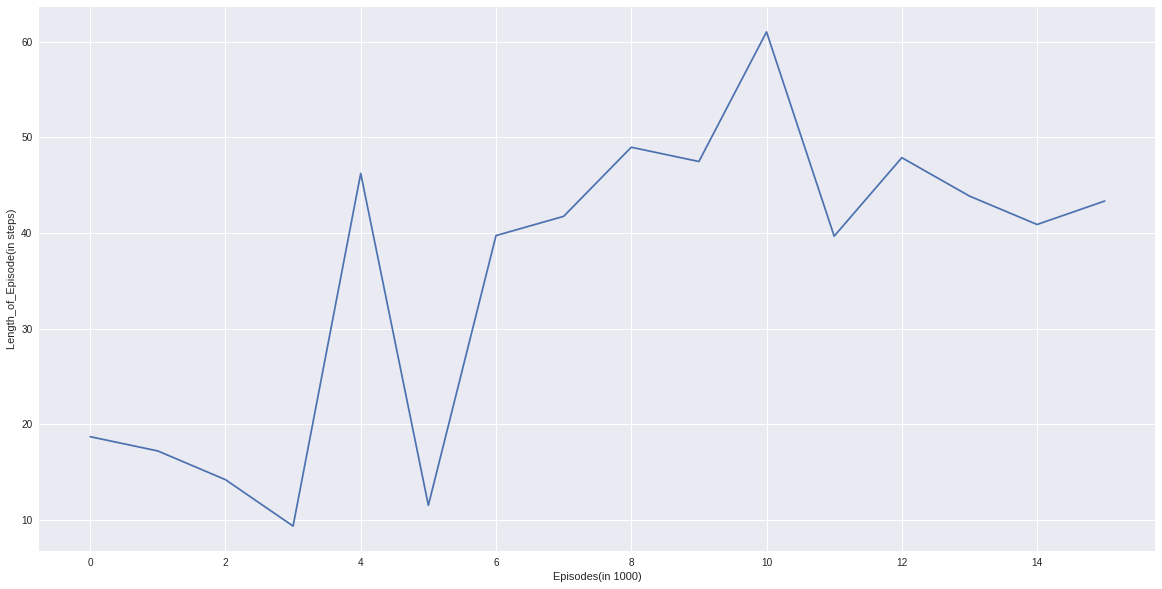

In [104]:

# Plotting Episode Length vs No of Episodes  
plt.figure(figsize=(20,10))
plt.xlabel('Episodes(in 1000)')
plt.ylabel('Length_of_Episode(in steps)')
plt.plot(episode_length)
plt.show()

**Visualising the Environment**

In [110]:
state = env.reset()
step = 0
max_steps = 100
done = False
for step in range(max_steps):
        
        # Take the action with the maximum expected future reward given that state
        action = greedy(Q, state, nA)
        new_state, reward, done, info = env.step(action)
        if done:
            # Printing Last state
            env.render()
            print("Number of steps", step)
            break
        state = new_state
env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 40
